# Figure

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.image import imread

params={'axes.labelsize': 8,
        'axes.titlesize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'axes.titlepad': 1,
        'axes.labelpad': 1,
        'lines.linewidth': 1,
        'legend.fontsize': 7
    }
matplotlib.rcParams.update(params)

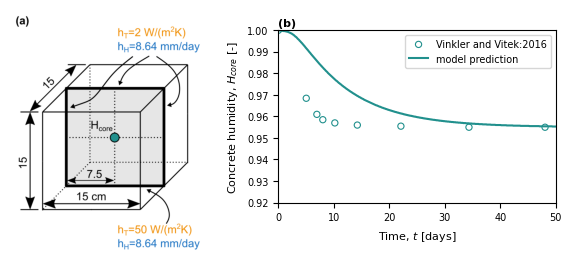

In [2]:
## Canvas design
figname= 'test'
fig_results= plt.figure(figname)
fig_results.set_size_inches(140/25.4, 63/25.4) # in mm

top= 0.915
btm= 0.22
rgt= 0.99
vspace = 0.13

w_f1= 0.357

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0, right=w_f1, bottom=0, top=1)
ax1 = plt.subplot(gs1[0,0])

gs2 = gridspec.GridSpec(1,1)
gs2.update(left=w_f1+vspace, right=rgt, bottom=btm, top=top)
ax2 = plt.subplot(gs2[0,0])


# Plot image
img = imread('sketch_Vinkler2016cube_v2.png')
ax1.imshow(img)
ax1.axis('off')

# Plot data 
expfile = 'DataExperiment_Vinkler2016_cubeDesiccation.txt'
expdata = np.loadtxt(expfile, skiprows=1)

exptimeHcenter = expdata[:, 0]
expHcenter = expdata[:, 1]/100

numfile = 'DataModel_simulation.txt'
numdata = np.loadtxt(numfile)

numtime = numdata[:, 0]/24
numHcenter = numdata[:, 1]


ax2.scatter(exptimeHcenter, expHcenter, label='Vinkler and Vitek:2016', 
         linewidth=0.8, marker='o', color='none', edgecolor='#21908d', s=20)

ax2.plot(numtime, numHcenter, label='model prediction', linewidth=1.5, color='#21908d')



ax2.text(0, 1.002, "(b)", fontsize=8, color='black', weight='bold')

ax2.set_ylabel('Concrete humidity, $H_{core}$ [-]', labelpad=5)
ax2.set_xlabel('Time, $t$ [days]', labelpad=5)
ax2.set_xlim(0, 50)
ax2.set_ylim(0.92, 1.0)


plt.legend()
plt.savefig('ModelVerification_ConcreteDryingSmallcube.png', dpi=300)
plt.show()
